# 3.15.x Final Assignment

### Assignment Instructions

#### Part 2   |   Advanced Difficulty Level

In this second part, you will be working with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information. 

In the usual `data` folder, you will find the following three datasets, including data from 2019, 2020 and 2021: 

- `startup_funding2019.xlsx`
- `startup_funding2020.xlsx`
- `startup_funding2021.xlsx`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

1. Using a **for loop**, load all three .xlsx files in a temporary DataFrame called `df_tmp` and, at each cycle, add a new column named `Year` that includes the year of that xlsx file to the temporary table and append it to a final DataFrame named `fnd`. Your final `fnd` DataFrame should include the contents from all three csv files stacked one on top of the other. 

    What is the **shape** of the `fnd` DataFrame? 

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import requests

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

In [2]:
#creo un data frame
df_tmp = pd.DataFrame()

In [3]:
#fai una lista vuota
dfs = []
#inizia il ciclo e per ogni ciclo prendi l'anno dal nome del file
for file in ['data/startup_funding2019.xlsx', 'data/startup_funding2020.xlsx', 'data/startup_funding2021.xlsx']:
    year = file[-9:-5]
    #leggi il file excel
    df_tmp = pd.read_excel(file)
    #crea la colonna anno e la aggiunge al df con il metodo append
    df_tmp['Year'] = year
    dfs.append(df_tmp)
#aggiungi dfs al dataframe vuoto fnd
fnd = pd.concat(dfs)


In [4]:
fnd

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019
...,...,...,...,...,...,...,...,...,...,...
1197,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A,2021
1198,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D,2021
1199,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C,2021
1200,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B,2021


In [5]:
#controllo che siano stati inseriti tutti e 3 gli anni 
print(fnd['Year'].unique())

['2019' '2020' '2021']


In [6]:
#verifico il numero di righe e di colonne del  nuovo data frame
fnd.shape

(2343, 10)

2. If you check the columns' data types, you'll notice that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. Format those three columns to numeric data types. 

    What is the **total** `Amount($)` of funding given in the three years available?

In [7]:
#elimino simbolo e virgola per convertire la colonna in valori numerici 
fnd["Amount($)"] = fnd["Amount($)"].str.replace("$", "", regex=True)
fnd["Amount($)"] = fnd["Amount($)"].str.replace(",", "", regex=True)
fnd['Amount($)']

0         6300000
1       150000000
2        28000000
3        30000000
4         6000000
          ...    
1197      3000000
1198     20000000
1199     55000000
1200     26000000
1201      8000000
Name: Amount($), Length: 2343, dtype: object

In [8]:
fnd = fnd.convert_dtypes()
#converte in valori numerici, errors='coerce' sostituisce i gli errori con valori nan
fnd['Founded'] = pd.to_numeric(fnd['Founded'], errors='coerce')
fnd['Amount($)'] = pd.to_numeric(fnd['Amount($)'], errors='coerce')
fnd['Year'] = pd.to_numeric(fnd['Year'],errors='coerce')
#verifico che sia avvenuta la corretta conversione
fnd.dtypes

Company/Brand     string
Founded          float64
HeadQuarter       string
Sector            string
What it does      string
Founders          string
Investor          object
Amount($)        float64
Stage             string
Year               int64
dtype: object

In [9]:
#ora posso sommare tutte le sommen della colonna amount per avere il totale delle somme finanziate
total_funding = fnd['Amount($)'].sum()

print(total_funding)

271543633855.83002


3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021). 

    How did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**? (Note: in the answer write the rank number, where 1 = most funded company)*

In [10]:
# run this cell (don not delete it)
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


In [11]:
#filtro solo per l'anno 2020
fnd_2020 = fnd[fnd['Year'] == 2020]

In [12]:
#raggruppo per investitori
investor_counts = fnd_2020.groupby('Investor').size()
investor_counts = investor_counts.sort_values(ascending=False)

In [13]:
#Inflection Point Ventures si trova alla 4 posizione
investor_counts

Investor
Venture Catalysts                              20
Mumbai Angels Network                          12
Angel investors                                12
Inflection Point Ventures                      11
Undisclosed                                    10
                                               ..
Homage Ventures.                                1
HostelFund                                      1
Huddle Accelerator                              1
Hummingbird Ventures, Bedrock Capital           1
responsAbility, Grameen Impact India (GIII)     1
Length: 848, dtype: int64

In [14]:
#vado a selezionare l'investiore che mi interessa e stampo il risultato del suo rank (importante inserire +1 perché su python si conta sempre partendo dal numero 0)

rank = investor_counts.index.get_loc("Inflection Point Ventures") + 1

print(f"Nel 2020, Inflection Point Ventures si classifica {rank} per maggior numero di compagnie finanziate.")

Nel 2020, Inflection Point Ventures si classifica 4 per maggior numero di compagnie finanziate.


4. Load the `Software Professionals Salary.csv` file in a DataFrame named `sps` (just like you did in Part 1), then perform the following tasks **and answer the question at the end**: 
    1. starting from the `sps` DataFrame, create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, create a new DF called `fnd_loc` where you group by `HeadQuarter` and show, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. merge the two DataFrames you just created so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc` *(note: make sure to use the correct type of join)*;
    4. using the `sps_fnd_loc` DataFrame: 
        1. delete the `HeadQuarter` column
        2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. delete the `Amount($)` column
        4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
    
    **Question**: Look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city? 

In [15]:
#carico il file excel
sps = pd.read_excel("data/Software Professionals Salary.xlsx")

In [16]:
#inzizio raggruppando per location e facendo la media delle colonne Rating e Salary
sps_loc = sps.groupby('Location').mean()[['Rating', 'Salary']].reset_index(False)


In [17]:
#filtro solo per l'anno 2021
fnd = fnd[fnd['Year'] == 2021]

In [18]:
fnd

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,<NA>,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1197,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021
1198,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021
1199,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021
1200,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021


In [19]:
#raggruppo per quartier generale, conto il numero di company/brande e sommo l'amount 
fnd_loc = fnd.groupby('HeadQuarter').agg({'Company/Brand': 'count', 'Amount($)': 'sum'}).reset_index(False)


In [20]:
#unisco i due data frame e li assegno ad una nuova variabile
sps_fnd_loc = sps_loc.merge(fnd_loc, 'inner', left_on= 'Location', right_on= 'HeadQuarter')

In [21]:
sps_fnd_loc

,Location,Rating,Salary,HeadQuarter,Company/Brand,Amount($)
0,Bangalore,3.920232,735344.739593,Bangalore,425,1.432742e+10
1,Chennai,3.902726,584559.661513,Chennai,40,7.171400e+08
2,Hyderabad,3.914484,679099.157376,Hyderabad,34,2.439600e+08
3,Jaipur,3.940741,629135.802469,Jaipur,11,3.433000e+08
4,Kolkata,4.024719,710925.573034,Kolkata,5,2.800000e+07
5,Mumbai,3.881709,961180.368491,Mumbai,200,1.538293e+11
6,New Delhi,3.943415,658756.735632,New Delhi,143,1.673010e+09
7,Pune,3.886082,690476.311153,Pune,46,5.090700e+08


In [22]:
#rimuovo la colonna indesiderata
sps_fnd_loc = sps_fnd_loc.drop(columns='HeadQuarter')


In [23]:
sps_fnd_loc

,Location,Rating,Salary,Company/Brand,Amount($)
0,Bangalore,3.920232,735344.739593,425,1.432742e+10
1,Chennai,3.902726,584559.661513,40,7.171400e+08
2,Hyderabad,3.914484,679099.157376,34,2.439600e+08
3,Jaipur,3.940741,629135.802469,11,3.433000e+08
4,Kolkata,4.024719,710925.573034,5,2.800000e+07
5,Mumbai,3.881709,961180.368491,200,1.538293e+11
6,New Delhi,3.943415,658756.735632,143,1.673010e+09
7,Pune,3.886082,690476.311153,46,5.090700e+08


In [24]:
#divido la colonna amount e inserisco il risultato in una nuova colonna
sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['Amount($)'] / 1000000


In [25]:
#rimuovo la colonna amount indesiderata
sps_fnd_loc = sps_fnd_loc.drop(columns='Amount($)')


In [26]:
#sistemo il data frame rinominando le colonne
sps_fnd_loc.columns = ['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']


In [27]:
sps_fnd_loc

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.920232,735344.739593,425,14327.42
1,Chennai,3.902726,584559.661513,40,717.14
2,Hyderabad,3.914484,679099.157376,34,243.96
3,Jaipur,3.940741,629135.802469,11,343.30
4,Kolkata,4.024719,710925.573034,5,28.00
5,Mumbai,3.881709,961180.368491,200,153829.30
6,New Delhi,3.943415,658756.735632,143,1673.01
7,Pune,3.886082,690476.311153,46,509.07


In [28]:
#mostro il nome della città con il punteggio di rating più alto
top_rating_city = sps_fnd_loc[sps_fnd_loc['Avg. Rating'] == sps_fnd_loc['Avg. Rating'].max()]['City']
top_rating_city

4    Kolkata
Name: City, dtype: object

In [29]:
#mostro il numero delle compagnie fondate nella città con il punteggio di rating più alto
kolkata = sps_fnd_loc[sps_fnd_loc['City'] == 'Kolkata']['Nr. Companies Funded']
kolkata

4    5
Name: Nr. Companies Funded, dtype: int64

5. Create a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`. Which `City` stands out in terms of total funding received by companies and salary paid to their employees? 

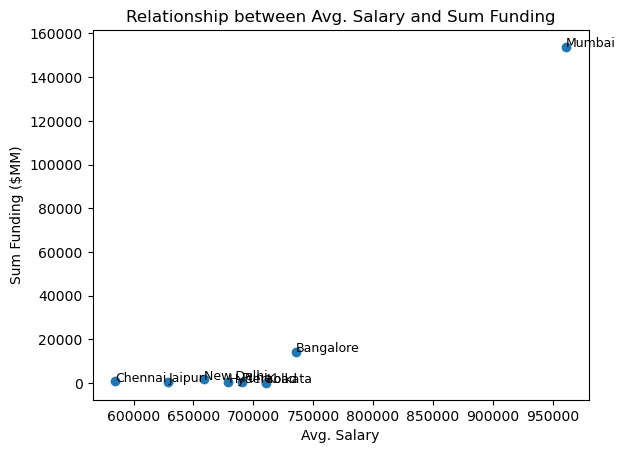

In [30]:
#prendo i valori delle colonne che mi iteressano per il grafico
x = sps_fnd_loc['Avg. Salary']
y = sps_fnd_loc['Sum Funding ($MM)']
#assegno una variabile alla colonna city, mi serve dopo per assegnare i nomi delle città
city_names = sps_fnd_loc['City']
#creo il grafico
plt.scatter(x, y)
#aggiungo titolo e label
plt.xlabel('Avg. Salary')
plt.ylabel('Sum Funding ($MM)')
plt.title('Relationship between Avg. Salary and Sum Funding')
#aggiungo i nomi delle città ai punti del grafico
for i, city in enumerate(city_names):
    plt.text(x[i],y[i],city,fontsize=9)
#mostro il grafico    
plt.show()


In [31]:
#stampo 2 variabili che mostrano la citta con più fondi ricevuti e con salario medio più elevato
top_fund = sps_fnd_loc[sps_fnd_loc['Sum Funding ($MM)'] == sps_fnd_loc['Sum Funding ($MM)'].max()]['City']
top_salary = sps_fnd_loc[sps_fnd_loc['Avg. Salary'] == sps_fnd_loc['Avg. Salary'].max()]['City']
top_fund,top_salary

(5    Mumbai
 Name: City, dtype: object,
 5    Mumbai
 Name: City, dtype: object)

6. [BONUS] --> optional

    Using libraries of your choice, scrape [this census page](https://www.census2011.co.in/city.php) and create a DataFrame called `cities` containing the first table from that page. *(Note: make sure to convert the variables `Population` and `Literacy` to numeric, you will need them later)*
    1. Which City has the highest levels of `Literacy` in the country?
    2. Merge the `cities` table with the `sps_fnd_loc` in a new DataFrame called `sps_fnd_loc_lit`. The resulting DataFrame is missing one row compared to the `sps_fnd_loc` dataset. Which `City` is missing? Figure out why and fix the problem. 
    3. Looking at the new `sps_fnd_loc_lit` DataFrame, produce a scatterplot that shows `Literacy` on the x-axis, `Avg. Salary` on the y-axis and the `Population` as the size of the circles. Try also to add the `City` labels to each circle in the chart. There seems to be a positive direct relationship between the two variables (higher levels of literacy correspond to higher salaries), but there is one city that escapes this interpretation. Which city is it? Try to describe the chart and give your interpretation. 

In [32]:
### DRIVER SETUP

# set the path to the ChromeDriver
path = "D:\Boolean\Corso\Module 3 - Python\chromedriver_win32/"

# initialise the driver (and open up a browser window)
driver = webdriver.Chrome(path + "chromedriver.exe")

# open up a specific web page
driver.get("https://www.census2011.co.in/city.php")

C:\Users\dricc\AppData\Local\Temp\ipykernel_12188\316042553.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path + "chromedriver.exe")


In [33]:
#prendo i dati dalla tabella all'interno della pagina web
table = driver.find_element(By.XPATH,"/html/body/div[2]/main/div[2]/table")


cities = pd.read_html(table.get_attribute('outerHTML'))[0]


print(cities.head(10))


    #       City           State  Population  Metropolitan  Sexratio  Literacy
0   1     Mumbai     Maharashtra    12442373      18414288       853     89.73
1   2      Delhi           Delhi    11034555      16314838       876     87.59
2   3  Bangalore       Karnataka     8443675       8499399       923     88.71
3   4  Hyderabad  Andhra Pradesh     6731790       7749334       955     83.26
4   5  Ahmedabad         Gujarat     5577940       6352254       898     88.29
5   6    Chennai      Tamil Nadu     4646732       8696010       989     90.18
6   7    Kolkata     West Bengal     4496694      14112536       908     86.31
7   8      Surat         Gujarat     4467797       4585367       756     87.89
8   9       Pune     Maharashtra     3124458       5049968       948     89.56
9  10     Jaipur       Rajasthan     3046163       3046163       900     83.33


In [34]:
#converto gli elementi del db nei tipi più corretti
cities.convert_dtypes()
cities.dtypes

#                 int64
City             object
State            object
Population        int64
Metropolitan      int64
Sexratio          int64
Literacy        float64
dtype: object

In [35]:
#con sort_values rivelo la citta con la Literacy più alta
top_literacy = cities.sort_values(by='Literacy',ascending=False)
top_literacy.head(10)

,#,City,State,Population,Metropolitan,Sexratio,Literacy
150,151,Aizawl,Mizoram,293416,293416,1025,98.36
73,74,Kochi,Kerala,602046,2117990,1027,97.36
137,138,Thrissur,Kerala,315957,1854783,1075,97.06
102,103,Kozhikode,Kerala,431560,2030519,1093,96.53
267,268,Alappuzha,Kerala,174176,241072,1077,96.20
60,61,Thiruvananthapuram,Kerala,743691,1687406,1054,95.10
194,195,Nagercoil,Tamil Nadu,224849,224849,1045,94.99
284,285,Alandur,Tamil Nadu,164430,164430,997,94.46
112,113,Agartala,Tripura,400004,400004,999,94.45
451,452,Khardaha,West Bengal,108496,108496,977,94.37


In [36]:
# questo fixa il problema, rinominando 'Delhi' in 'New Delhi'
cities.loc[1,['City']]=['New Delhi']
# ora si può procedere con l'inner join senza problemi
sps_fnd_loc_lit = cities.merge(sps_fnd_loc, how='inner')
sps_fnd_loc_lit

,#,City,State,Population,Metropolitan,Sexratio,Literacy,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,1,Mumbai,Maharashtra,12442373,18414288,853,89.73,3.881709,961180.368491,200,153829.30
1,2,New Delhi,Delhi,11034555,16314838,876,87.59,3.943415,658756.735632,143,1673.01
2,3,Bangalore,Karnataka,8443675,8499399,923,88.71,3.920232,735344.739593,425,14327.42
3,4,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26,3.914484,679099.157376,34,243.96
4,6,Chennai,Tamil Nadu,4646732,8696010,989,90.18,3.902726,584559.661513,40,717.14
5,7,Kolkata,West Bengal,4496694,14112536,908,86.31,4.024719,710925.573034,5,28.00
6,9,Pune,Maharashtra,3124458,5049968,948,89.56,3.886082,690476.311153,46,509.07
7,10,Jaipur,Rajasthan,3046163,3046163,900,83.33,3.940741,629135.802469,11,343.30


In [37]:
#prima mancava new Delhi in una dei 2 database
sps_fnd_loc['City'].unique()


array(['Bangalore', 'Chennai', 'Hyderabad', 'Jaipur', 'Kolkata', 'Mumbai',
       'New Delhi', 'Pune'], dtype=object)

In [38]:
sps_fnd_loc_lit['City'].unique()

array(['Mumbai', 'New Delhi', 'Bangalore', 'Hyderabad', 'Chennai',
       'Kolkata', 'Pune', 'Jaipur'], dtype=object)

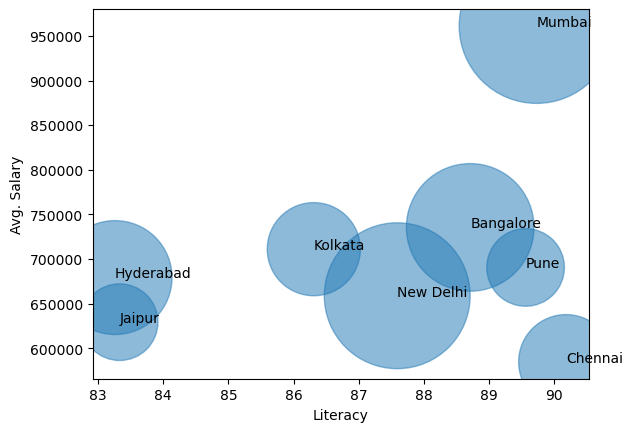

In [39]:
# Creo una figura e un subplot
fig, ax = plt.subplots()

# Creo il grafico e moltiplico per 0.001 per ridurre le dimensioni dei punti e alpha per dare trasparenza
scatter = ax.scatter(x=sps_fnd_loc_lit['Literacy'], y=sps_fnd_loc_lit['Avg. Salary'], s=sps_fnd_loc_lit['Population']*0.001,alpha=0.5)

# aggiungo i labels su ogni punto
for i, txt in enumerate(sps_fnd_loc_lit['City']):
    ax.text(sps_fnd_loc_lit['Literacy'][i], sps_fnd_loc_lit['Avg. Salary'][i], txt)

# Setto il label nell'asse x
ax.set_xlabel('Literacy')

# Setto il label nell'asse y
ax.set_ylabel('Avg. Salary')

# mostro il plot
plt.show()